In [1]:
%%time

import pandas as pd
import numpy as np
from scipy import stats
from datetime import datetime

CORE_COLUMNS = ['CMTE_NM','RPT_TP','NAME','CITY','STATE','ZIP_CODE','TRANSACTION_DT','TRANSACTION_AMT','PURPOSE','CATEGORY']
pres_cmtes = ['DONALD J. TRUMP FOR PRESIDENT, INC.','CRUZ FOR PRESIDENT','KASICH FOR AMERICA, INC.','MARCO RUBIO FOR PRESIDENT','CARSON AMERICA','GILMORE FOR AMERICA LLC','SANTORUM FOR PRESIDENT 2016','PATAKI FOR PRESIDENT INC']
FINAL_PRIMARY_DT = "June 7, 2016"
final_primary = datetime.strptime(FINAL_PRIMARY_DT, '%B %d, %Y')

# Read in data
df_header = pd.read_csv("~/Documents/Insight/Data - Insight/oppexp_header_file.csv")
df = pd.read_csv("~/Documents/Insight/Data - Insight/oppexp16/oppexp.txt", delimiter="|", low_memory=False, names=df_header.columns, index_col=False)
cmte_header = pd.read_csv("~/Documents/Insight/Data - Insight/cm20/cm_header_file.csv") # pull in header for committee names file
cmte_names = pd.read_csv("~/Documents/Insight/Data - Insight/cm20/cm.txt", delimiter="|", names=cmte_header.columns) # pull in committee names file

# Clean data
df = ( df.set_index('CMTE_ID') ).join(cmte_names.set_index('CMTE_ID')) 
df = df.reset_index()
df['TRANSACTION_DT']=pd.to_datetime(df['TRANSACTION_DT'],errors = 'coerce')
df = df[df['TRANSACTION_AMT']>0]
print(df)

           CMTE_ID AMNDT_IND  RPT_YR RPT_TP           IMAGE_NUM LINE_NUM  \
0        C00000422         N    2015     M8  201508119000814199      21B   
1        C00000422         N    2015     M8  201508119000814199      21B   
2        C00000422         N    2015     M9  201509109001633191      21B   
3        C00000422         N    2015     M7  201507149000106216      21B   
4        C00000422         N    2015     YE  201601139004480408      21B   
...            ...       ...     ...    ...                 ...      ...   
1755093  C99002396         N    2016     Q2  201607079020368424      21B   
1755094  C99002396         N    2016     Q2  201607079020368424      21B   
1755095  C99002396         N    2016     Q2  201607079020368424      21B   
1755096  C99002396         N    2016     Q2  201607079020368425      21B   
1755097  C99002396         N    2016     Q2  201607079020368425      21B   

        FORM_TP_CD SCHED_TP_CD                               NAME  \
0              F3X

In [2]:
pres_cmtes = ['DONALD J. TRUMP FOR PRESIDENT, INC.','CRUZ FOR PRESIDENT','KASICH FOR AMERICA, INC.','MARCO RUBIO FOR PRESIDENT','CARSON AMERICA','GILMORE FOR AMERICA LLC','SANTORUM FOR PRESIDENT 2016','PATAKI FOR PRESIDENT INC']

df = df[df.apply(lambda x: x.CMTE_NM in pres_cmtes, axis=1)]

from datetime import datetime
FINAL_PRIMARY_DT = "June 7, 2016"
final_primary = datetime.strptime(FINAL_PRIMARY_DT, '%B %d, %Y')

df = df[df.TRANSACTION_DT.apply(lambda x: x<=final_primary) ]


In [3]:
# %% time
# from sklearn.cluster import DBSCAN
# import numpy as np

# clustering = DBSCAN(eps=3, min_samples=2).fit_predict(df[['TRANSACTION_AMT','TRANSACTION_DT']].join(dummies))
# #clustering.labels_

# print(clustering) 

In [4]:
# from sklearn.cluster import DBSCAN
# import numpy as np

# clustering = DBSCAN(eps=3, min_samples=2).fit_predict(df.iloc[:,1:])
# #clustering.labels_

# clustering 

In [5]:

grouped = df[['PURPOSE','TRANSACTION_AMT']].groupby('PURPOSE').sum().reset_index()
grouped = grouped.sort_values('TRANSACTION_AMT', ascending=False)
grouped

,PURPOSE,TRANSACTION_AMT
898,MEDIA,29997063.35
899,MEDIA BUY,21839831.23
1198,PLACED MEDIA,20000149.00
1748,TRAVEL,10913731.21
1250,POSTAGE,9128644.84
...,...,...
76,BATTERIES,3.69
970,MOBILE PHONE EXPENSE,3.50
1197,PICTURE PRINTING,3.20
1736,TRANSACTION FEE,1.00


In [6]:
# grouped = grouped.set_index('PURPOSE')
# num = grouped.loc[top_cats].sum().values[0]
# num

In [7]:
num_cats = 50
top_cats = grouped['PURPOSE'][:num_cats]
top_cats

898                                                 MEDIA
899                                             MEDIA BUY
1198                                         PLACED MEDIA
1748                                               TRAVEL
1250                                              POSTAGE
755                               FUNDRAISING PHONE CALLS
1140                                              PAYROLL
1324                                     PRINTING/POSTAGE
2459                                          WEB SERVICE
348                                   CREDIT CARD PAYMENT
1215                        POLITICAL STRATEGY CONSULTING
1266                                     POSTAGE/PRINTING
451                             DIGITAL MEDIA/WEB SERVICE
1808                                          TRAVEL: AIR
341                  CREDIT CARD MERCHANT FEE/LIST RENTAL
255             COLLATERAL: TSHIRTS/MUGS/STICKERS/FREIGHT
1578                                               SALARY
344           

In [8]:
num=grouped[:num_cats].sum().values[1]
print(num)


218962877.2999996


In [9]:
%%time

den = df['TRANSACTION_AMT'].sum()
print(den)

295225134.19
Wall time: 1.98 ms


In [10]:
# 54% coverage of *total amount*
num/den

0.741681015407991

In [11]:
# % coverage of *number of transactions*
grouped2 = df[['PURPOSE','TRANSACTION_AMT']].groupby('PURPOSE').count().reset_index()
grouped2 = grouped2.sort_values('TRANSACTION_AMT', ascending=False)
grouped2

,PURPOSE,TRANSACTION_AMT
1748,TRAVEL,10632
30,AIRFARE,3258
882,LODGING,3257
1140,PAYROLL,2813
1037,OFFICE SUPPLIES,1887
...,...,...
1129,PARKING SERVICES [JURIAN: SB23.6802],1
1128,PARKING SERVICES [JURIAN: SB23.6801],1
1126,PARKING SERVICES [DECK: SB23.7393],1
1125,PARKING SERVICES [BYERS: SB23.455479],1


In [12]:
num_cats = 50
top_cats2 = grouped2['PURPOSE'][:num_cats]
grouped2 = grouped2.set_index('PURPOSE')
top_cats2

1748                                               TRAVEL
30                                                AIRFARE
882                                               LODGING
1140                                              PAYROLL
1037                                      OFFICE SUPPLIES
1578                                               SALARY
1744                                       TRANSPORTATION
730                                         FOOD/BEVERAGE
734                                        FOOD/BEVERAGES
151                                            CAR RENTAL
1601                                             SHIPPING
1215                        POLITICAL STRATEGY CONSULTING
963                                         MERCHANT FEES
725                                     FOOD AND BEVERAGE
1250                                              POSTAGE
1592                                            SEE MEMOS
350                         CREDIT CARD PAYMENT-SEE MEMOS
339           

In [13]:
num = grouped2.loc[top_cats2].sum().values[0]
num

41383

In [14]:
den = grouped2.sum().values[0]
den

57502

In [15]:
num/den

0.7196793155020695

In [16]:

def count_table(groupby_obj):
    count_table = groupby_obj.count()
    return count_table.sort_values('TRANSACTION_AMT', ascending=False)

def get_top_cats(table,num_cats):
    cats = table[:num_cats]
    return cats

def count_coverage(table,cats):
    num = table.loc[cats].sum().values[0]
    den = table.sum().values[0]
    return num/den

In [17]:
num_cats = 50
grouped = df[['PURPOSE','TRANSACTION_AMT']].groupby('PURPOSE')
count_table = count_table(grouped)
#get_top_cats(count_table,num_cats)

In [18]:
cats = top_cats.append(top_cats2).unique()

In [19]:
#count coverage:
num = grouped2.loc[cats].sum().values[0]
den = grouped2.sum().values[0]
num/den

0.7454523320927968

In [24]:
grouped.head()

,PURPOSE,TRANSACTION_AMT
718094,LODGING,243.47
718095,OFFICE SUPPLIES,89.92
718096,OFFICE SUPPLIES,77.88
718097,TRANSPORTATION,189.00
718098,TRANSPORTATION,126.00
...,...,...
1589827,CANDIDATE PHOTOS,681.82
1589831,LAWN SIGNS,301.13
1589832,MEETING FEES,98.42
1589838,CREDIT CARD FEE,115.89


In [20]:
#amount coverage:
grouped3 = grouped.set_index('PURPOSE')
num = grouped3.loc[cats].sum().values[0]
den = df['TRANSACTION_AMT'].sum()
num/den

AttributeError: Cannot access callable attribute 'set_index' of 'DataFrameGroupBy' objects, try using the 'apply' method

In [36]:
%%time

df = df[df.apply(lambda x: x.PURPOSE in cats, axis=1)]
print(df)

           CMTE_ID AMNDT_IND  RPT_YR RPT_TP           IMAGE_NUM LINE_NUM  \
718094   C00458844         N    2015     YE  201601319005212258       23   
718095   C00458844         N    2015     YE  201601319005212287       23   
718096   C00458844         N    2015     YE  201601319005212287       23   
718097   C00458844         N    2015     YE  201601319005212288       23   
718098   C00458844         N    2015     YE  201601319005212288       23   
...            ...       ...     ...    ...                 ...      ...   
1589830  C00582668         N    2016     Q1  201604159012468047       23   
1589834  C00582668         N    2016     Q1  201604159012468048       23   
1589836  C00582668         N    2016     Q1  201604159012468032       23   
1589837  C00582668         N    2016     Q1  201604159012468032       23   
1589844  C00582668         N    2016     Q1  201604159012468041       23   

        FORM_TP_CD SCHED_TP_CD                              NAME        CITY  \
718094 

In [37]:
%%time
dummies = pd.get_dummies(df.PURPOSE,sparse=True)
print(dummies)

         AIRFARE  BALLOT ACCESS CONSULTING  BANK FEE  BANK FEES  CAR RENTAL  \
718094         0                         0         0          0           0   
718095         0                         0         0          0           0   
718096         0                         0         0          0           0   
718097         0                         0         0          0           0   
718098         0                         0         0          0           0   
...          ...                       ...       ...        ...         ...   
1589830        0                         0         0          0           0   
1589834        0                         0         0          0           0   
1589836        0                         0         0          0           0   
1589837        0                         0         0          0           0   
1589844        0                         0         0          0           0   

         COLLATERAL: HATS  COLLATERAL: TSHIRTS/MUGS

In [38]:
%%time

from sklearn.cluster import DBSCAN
import numpy as np

clustering = DBSCAN(eps=3, min_samples=2).fit_predict(df[['TRANSACTION_AMT']].join(dummies))
#clustering.labels_

print(clustering) 

[ 0  0  0 ... 56 56  0]
Wall time: 15.7 s


In [116]:
%%time
#2 mins for eps=3000!
from sklearn.cluster import DBSCAN
import numpy as np

clustering2 = DBSCAN(eps=3000, min_samples=10).fit_predict(df[['TRANSACTION_AMT']].join(dummies))

print(clustering2) 

[0 0 0 ... 0 0 0]
Wall time: 2min 33s


In [117]:
max(clustering2)

9

In [118]:
# # check to see if each cluster is just one category
# cluster = df[clustering2==4]
# cluster.groupby('PURPOSE')['TRANSACTION_AMT'].sum().sort_values()

In [122]:
outliers2 = df[clustering2==-1]
print(len(outliers2))
outliers2[['CMTE_NM','TRANSACTION_AMT']].groupby('CMTE_NM').count()
outliers2[outliers2.CMTE_NM == 'CARSON AMERICA'].groupby('PURPOSE')['TRANSACTION_AMT'].sum().sort_values()

197


PURPOSE
POLITICAL STRATEGY CONSULTING/TRAVEL     183684.09
PRINTING                                 206266.40
DATABASE MANAGEMENT SERVICE              282368.04
LIST RENTAL                              344482.78
TRAVEL                                   787672.07
DATABASE MANAGEMENT SERVICES            1505414.68
DIGITAL MEDIA/WEB SERVICE               1572463.50
CREDIT CARD PAYMENT                     1680718.90
POSTAGE                                 1777753.97
WEB SERVICE                             1867119.32
PRINTING/POSTAGE                        1930463.83
POSTAGE/PRINTING                        3024740.84
FUNDRAISING PHONE CALLS                 3456273.30
MEDIA                                   4623813.29
Name: TRANSACTION_AMT, dtype: float64

In [45]:
outliers = df[clustering==-1]
outliers[['CMTE_NM','TRANSACTION_AMT']].groupby('CMTE_NM').count()

,TRANSACTION_AMT
CMTE_NM,
CARSON AMERICA,532
CRUZ FOR PRESIDENT,429
"DONALD J. TRUMP FOR PRESIDENT, INC.",446
"KASICH FOR AMERICA, INC.",215
MARCO RUBIO FOR PRESIDENT,200
SANTORUM FOR PRESIDENT 2016,1


In [40]:
len(df)

42865

In [35]:
for cat in cats:
    print(cat)

MEDIA
MEDIA BUY
PLACED MEDIA
TRAVEL
POSTAGE
FUNDRAISING PHONE CALLS
PAYROLL
PRINTING/POSTAGE
WEB SERVICE
CREDIT CARD PAYMENT
POLITICAL STRATEGY CONSULTING
POSTAGE/PRINTING
DIGITAL MEDIA/WEB SERVICE
TRAVEL: AIR
CREDIT CARD MERCHANT FEE/LIST RENTAL
COLLATERAL: TSHIRTS/MUGS/STICKERS/FREIGHT
SALARY
CREDIT CARD MERCHANT FEES/LIST RENTAL
DATABASE MANAGEMENT SERVICES
DIGITAL MEDIA SERVICE/SURVEY RESEARCH/DONOR MODELING
ONLINE FUNDRAISING SERVICES
LIST RENTAL
STRATEGIC CONSULTING
WEBSITE DEVELOPMENT/DIGITAL CONSULTING
FIELD CONSULTING
CREDIT CARD PAYMENT-SEE MEMOS
AIRFARE
FACILITY RENTAL
DATABASE MANAGEMENT SERVICE
LEGAL CONSULTING
POLITICAL STRATEGY CONSULTING/TRAVEL
PRINTING AND DESIGN SERVICES
RENT
CREDIT CARD MERCHANT FEE
EVENT STAGING EXPENSE
BALLOT ACCESS CONSULTING
TELEMARKETING
COLLATERAL: HATS
LODGING
WEB SERVICES
POSTAGE/LIST RENTAL
DIRECT MAIL PRINTING AND POSTAGE
TELEMARKETING AND DATA
ONLINE/WEB CONSULTING
CREDIT CARD PAYMENT: SEE MEMO ENTRIES
SURVEY RESEARCH/TRAVEL
FINANCE CONSUL

In [60]:
from fuzzywuzzy import process, fuzz

In [84]:
purposes = df.PURPOSE.unique()
deduped_cats = process.dedupe(purposes)

In [85]:
len(deduped_cats)

41

In [88]:
deduped_cats

dict_keys(['TRAVEL: LODGING [AMEX: SB23.11631135]', 'OFFICE SUPPLIES', 'TRANSPORTATION', 'SOFTWARE', 'INTERNET', 'CREDIT CARD PAYMENT: SEE MEMO ENTRIES', 'AIRFARE', 'FOOD AND BEVERAGE', 'SHIPPING', 'TELEMARKETING AND DATA', 'POLITICAL STRATEGY CONSULTING', 'TRAVEL EXPENSE REIMBURSEMENT: ITEMIZATION BELOW IF REQUIRED', 'CREDIT CARD MERCHANT FEES/LIST RENTAL', 'UTILITIES', 'DATABASE MANAGEMENT SERVICES', 'ONLINE FUNDRAISING SERVICES', 'RENT', 'SALARY', 'MILEAGE', 'CREDIT CARD PAYMENT-SEE MEMOS', 'DIRECT MAIL PRINTING AND POSTAGE', 'BANK FEES', 'DIGITAL MEDIA SERVICE/SURVEY RESEARCH/DONOR MODELING', 'WEBSITE DEVELOPMENT/DIGITAL CONSULTING', 'POLITICAL STRATEGY CONSULTING/TRAVEL', 'PERSONNEL SERVICE/EQUIPMENT', 'EQUIPMENT PURCHASE', 'SUBSCRIPTIONS', 'FACILITY RENTAL', 'PAYROLL', 'DELIVERY', 'FUNDRAISING PHONE CALLS', 'BALLOT ACCESS CONSULTING', 'EVENT STAGING EXPENSE', 'PRINTING AND DESIGN SERVICES', 'PLACED MEDIA', 'COLLATERAL: TSHIRTS/MUGS/STICKERS/FREIGHT', 'DISBURSEMENTS LESS THAN $200

In [82]:
# #this takes too long
# #come up with a dictionary instead
# %%time
# #help(process.extractOne)
# def fun(x):
#     match = process.extractOne(x.PURPOSE,cats,score_cutoff=70)
#     if match:
#         return match[0]
#     else:
#         return None
    
# df.apply(fun, axis=1) #set as new column
# print('timed')

Help on function extractOne in module fuzzywuzzy.process:

extractOne(query, choices, processor=<function full_process at 0x00000224830AE708>, scorer=<function WRatio at 0x0000022483208828>, score_cutoff=0)
    Find the single best match above a score in a list of choices.
    
    This is a convenience method which returns the single best choice.
    See extract() for the full arguments list.
    
    Args:
        query: A string to match against
        choices: A list or dictionary of choices, suitable for use with
            extract().
        processor: Optional function for transforming choices before matching.
            See extract().
        scorer: Scoring function for extract().
        score_cutoff: Optional argument for score threshold. If the best
            match is found, but it is not greater than this number, then
            return None anyway ("not a good enough match").  Defaults to 0.
    
    Returns:
        A tuple containing a single match and its score, i

KeyboardInterrupt: 

TypeError: scatter() missing 1 required positional argument: 'y'

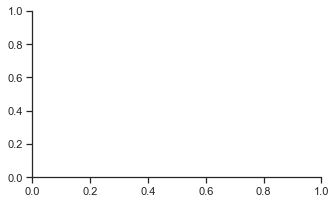

In [125]:
import numpy 
import pandas
from  matplotlib import pyplot
import seaborn
seaborn.set(style='ticks')

# numpy.random.seed(0)
# N = 37
# _genders= ['Female', 'Male', 'Non-binary', 'No Response']
# df = pandas.DataFrame({
#     'Height (cm)': numpy.random.uniform(low=130, high=200, size=N),
#     'Weight (kg)': numpy.random.uniform(low=30, high=100, size=N),
#     'Gender': numpy.random.choice(_genders, size=N)
# })

fg = seaborn.FacetGrid(data=df[['TRANSACTION_AMT','PURPOSE']], hue='PURPOSE', aspect=1.61)
fg.map(pyplot.scatter, 'TRANSACTION_AMT').add_legend()

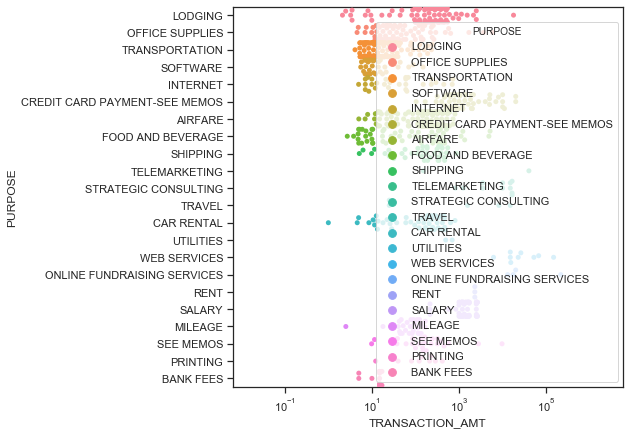

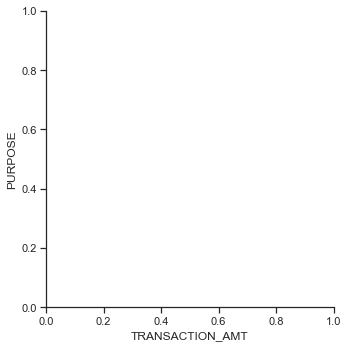

In [141]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks", color_codes=True)

f, ax = plt.subplots(figsize=(7, 7))

ax.set(xscale="log")
cat_plot = sns.catplot(x="TRANSACTION_AMT", y="PURPOSE", hue="PURPOSE", kind="swarm", ax=ax, data=df[['TRANSACTION_AMT','PURPOSE']].iloc[:1000,:],legend=False);


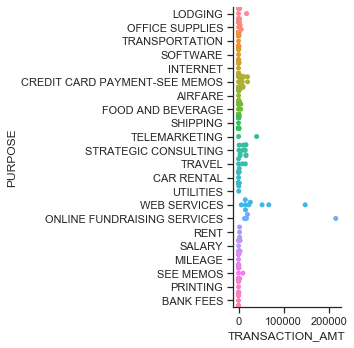

In [143]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks", color_codes=True)
cat_plot = sns.catplot(x="TRANSACTION_AMT", y="PURPOSE", hue="PURPOSE", kind="swarm", data=df[['TRANSACTION_AMT','PURPOSE']].iloc[:1000,:],legend=False);
